<a href="https://colab.research.google.com/github/jshiba-stack/ML-Portfolio-JonathanShiba/blob/main/EEG_Filtering_and_FFT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG Signal Filtering and FFT with MNE-Python

This notebook demonstrates how to:
- Load EEG data using MNE
- Apply a bandpass filter (8–30 Hz)
- Visualize raw and filtered EEG
- Compute and plot the FFT / Power Spectral Density (PSD)

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.3 MB/s eta 0:00:00


Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.74TB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 03m22s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


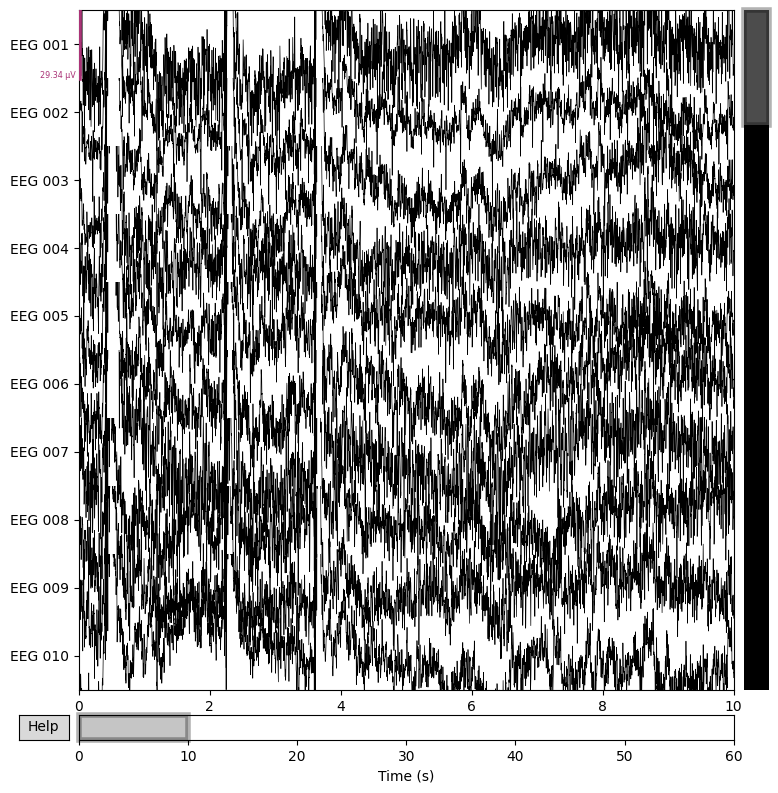

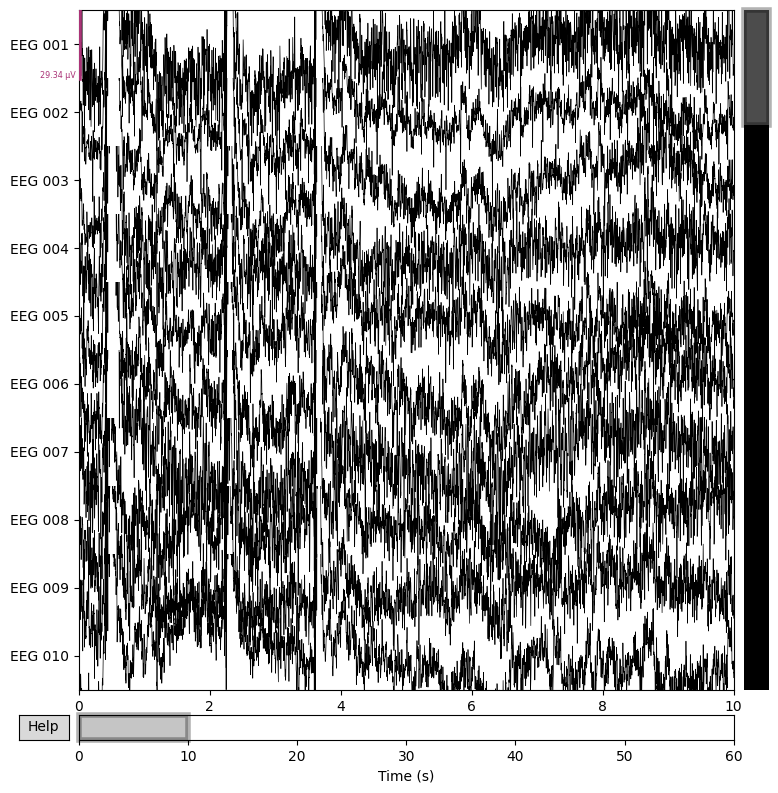

In [ ]:
import mne

# Download and load example data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

# Load the raw data
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.pick_types(meg=False, eeg=True)  # Keep only EEG channels
raw.crop(0, 60)  # Trimming to first 60 secs
raw.plot(n_channels=10, scalings='auto')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 993 samples (1.653 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.3s finished


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3965 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.2s finished


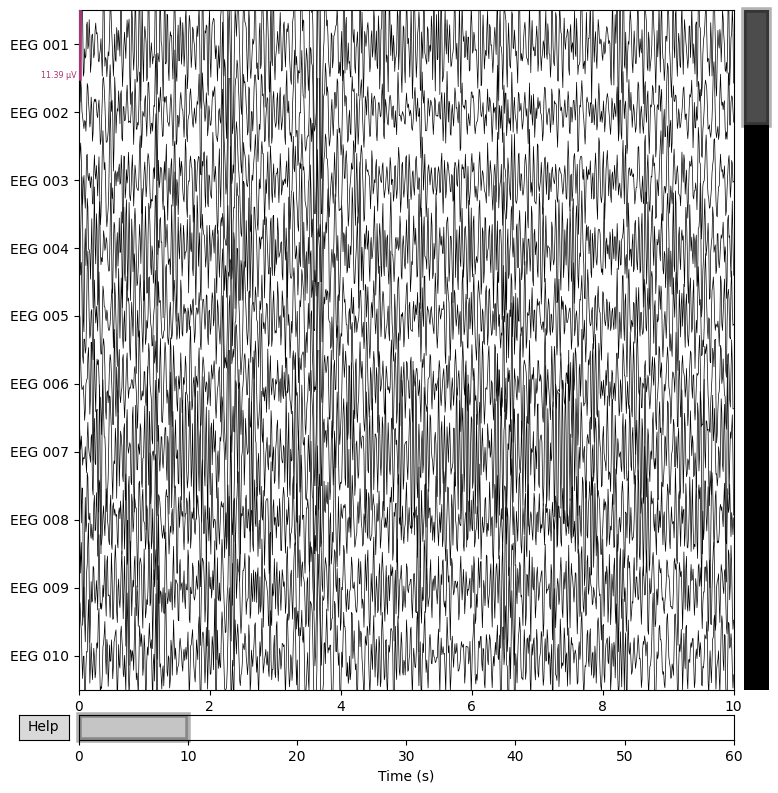

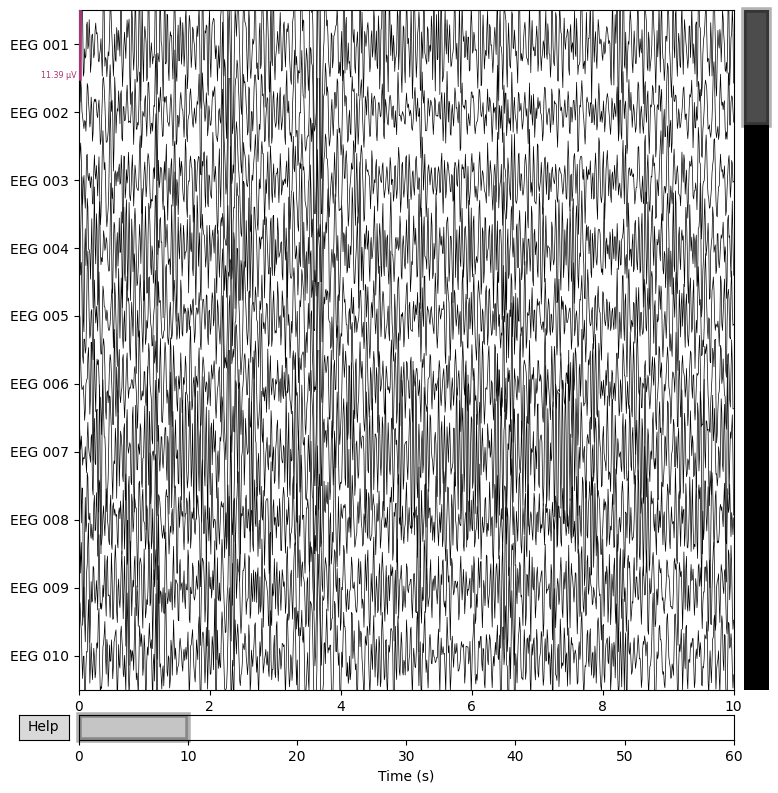

In [ ]:
# Apply bandpass filter (motor imagery: 8-30 Hz)
raw.filter(l_freq=8., h_freq=30.)
raw.notch_filter(freqs=60)
raw.plot(n_channels=10, scalings='auto')


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


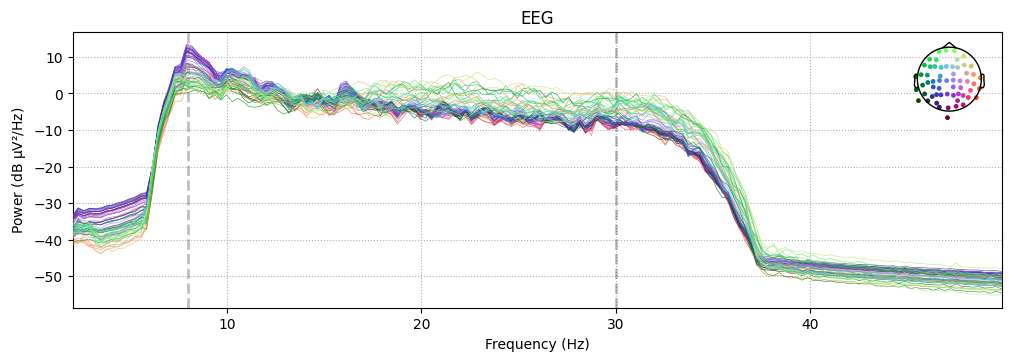

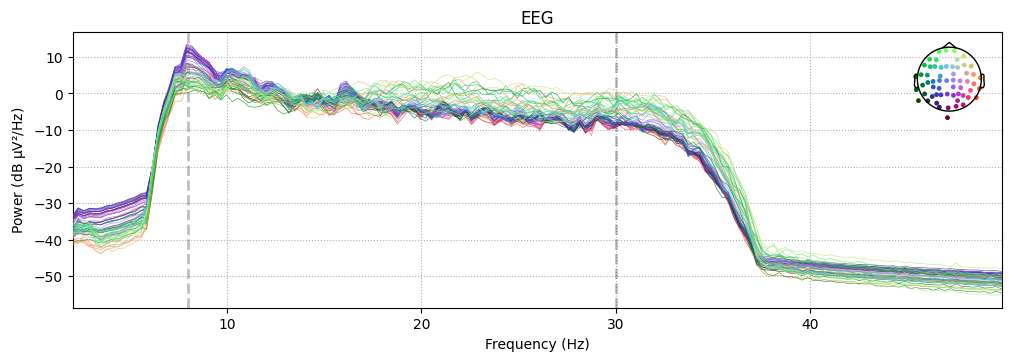

In [ ]:
# Plot Power Spectral Density (FFT-based)
raw.plot_psd(fmin=2., fmax=50.)


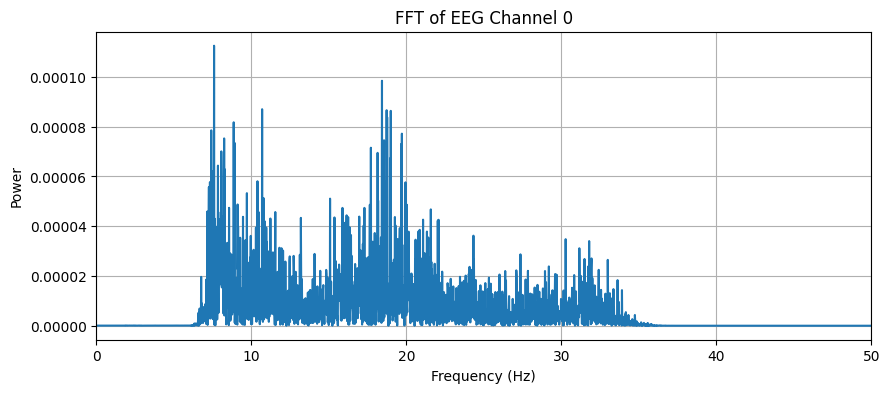

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick one EEG channel (e.g., channel 0)
data, times = raw[:1]  # shape: (1, n_times)
signal = data[0]

# Sampling rate
sfreq = raw.info['sfreq']
n = len(signal)

# Compute FFT
fft_vals = np.fft.rfft(signal)
fft_freqs = np.fft.rfftfreq(n, d=1/sfreq)
fft_power = np.abs(fft_vals) ** 2

# Plot
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, fft_power)
plt.title('FFT of EEG Channel 0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, 50)
plt.grid(True)
plt.show()